# 이동통신 사용자 데이터 분석

## 가입을 해지한 원인을 분석.

#### 가입을 해지한 그룹과 유지한 그룹으로 나눠 분석을 하였습니다.

#### Leave	가입해지여부(1이면 해지)
#### MemberWeeks	가입기간
#### NewContract	가입갱신여부(1이면 갱신)
#### IsData	데이터요금제사용여부(1이면 사용)
#### DataAmount	데이터사용량(GB)
#### Callcenter	고객센터전화량
#### CalMins	월평균전화량(분)
#### CalCounts	월평균전화수(횟수)
#### MonthlyFee	월평균요금
#### OverFee	초과요금
#### RoamingMin	로밍시간(분)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = [16, 9]
tel = pd.read_csv('telco.csv')
tel.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10


In [74]:
tel.dtypes.value_counts()

int64      6
float64    5
dtype: int64

In [75]:
tel.isnull().sum() #결측값 없음

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

In [76]:
tel.info() #메모리 차지 공간이 적어 따로 메모리 줄일 필요성 x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


#### 
##### 결측값이 없고 메모리 총량이 작아 따로 메모리를 줄일 필요성이 없다 판단.
####  

In [77]:
tel.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
MemberWeeks,3333.00,101.06,39.82,1.00,74.00,101.00,127.00,243.00
NewContract,3333.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
IsData,3333.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
DataAmount,3333.00,0.82,1.27,0.00,0.00,0.00,1.78,5.40
Callcenter,3333.00,1.56,1.32,0.00,1.00,1.00,2.00,9.00
CalMins,3333.00,179.78,54.47,0.00,143.70,179.40,216.40,350.80
CalCounts,3333.00,100.44,20.07,0.00,87.00,101.00,114.00,165.00
MonthlyFee,3333.00,56.31,16.43,14.00,45.00,53.50,66.20,111.30
OverFee,3333.00,10.05,2.54,0.00,8.33,10.07,11.77,18.19


### 가입갱신
#### 가입갱신의 비율
#### 가설: 계약을 유지한 사람들이 해지한 사람에 비해가입갱신 비율이 더 높다.
#### 해지한 사람은 약 71.6%로 유지한 사람(93.5%)보다 21.9% 가입갱신이 낮다. 
##### (전체 인원중 가입 갱신을 한 비율은 90%이다)

#### 가입해지 한 사람

In [78]:
no_use_index = tel[tel['Leave']==0].index
no_use = tel.drop(no_use_index)
#no_use.describe().T

#### 가입을 유지한 사람

In [79]:
use_tel_index = tel[tel['Leave']==1].index
use_tel = tel.drop(use_tel_index)
#use_tel.describe().T
#가입유지

#### 데이터를 사용하는 사람

In [80]:
use_data_index = tel[tel['IsData']==0].index
use_data = tel.drop(use_data_index)
#use_data.describe().T
#데이터 사용하는 사람

#### 데이터를 사용 안하는 사람

In [81]:
no_data_index = tel[tel['IsData']==1].index
no_data = tel.drop(no_data_index)
#use_data.describe().T

#### 가입해지 및 데이터를 사용하는 사람

In [82]:
temp = no_use[no_use['IsData']==0].index
nouse_usedata= no_use.drop(temp)

#### 가입해지 및 데이터 사용 안하는 사람

In [83]:
temp1 = no_use[no_use['IsData']==1].index
nouse_nodata= no_use.drop(temp1)

#### 가입 유지 및 데이터 사용 하는 사람

In [84]:
temp2 = use_tel[use_tel['IsData']==0].index
use_usedata=use_tel.drop(temp2)

#### 가입 유지 및 데이터 사용 안하는 사람

In [85]:
temp3 = use_tel[use_tel['IsData']==1].index
use_nodata=use_tel.drop(temp3)

In [86]:
no_use.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,483.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
MemberWeeks,483.00,102.66,39.47,1.00,76.00,103.00,127.00,225.00
NewContract,483.00,0.72,0.45,0.00,0.00,1.00,1.00,1.00
IsData,483.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
DataAmount,483.00,0.55,1.16,0.00,0.00,0.00,0.29,5.40
Callcenter,483.00,2.23,1.85,0.00,1.00,2.00,4.00,9.00
CalMins,483.00,206.91,69.00,0.00,153.25,217.60,265.95,350.80
CalCounts,483.00,101.34,21.58,0.00,87.50,103.00,116.50,165.00
MonthlyFee,483.00,59.19,16.07,14.00,45.00,63.00,69.00,110.00
OverFee,483.00,10.62,2.59,3.55,8.86,10.57,12.48,18.19


In [87]:
tel.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
MemberWeeks,3333.00,101.06,39.82,1.00,74.00,101.00,127.00,243.00
NewContract,3333.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
IsData,3333.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
DataAmount,3333.00,0.82,1.27,0.00,0.00,0.00,1.78,5.40
Callcenter,3333.00,1.56,1.32,0.00,1.00,1.00,2.00,9.00
CalMins,3333.00,179.78,54.47,0.00,143.70,179.40,216.40,350.80
CalCounts,3333.00,100.44,20.07,0.00,87.00,101.00,114.00,165.00
MonthlyFee,3333.00,56.31,16.43,14.00,45.00,53.50,66.20,111.30
OverFee,3333.00,10.05,2.54,0.00,8.33,10.07,11.77,18.19


In [88]:
no_use.MemberWeeks.describe().T

count   483.00
mean    102.66
std      39.47
min       1.00
25%      76.00
50%     103.00
75%     127.00
max     225.00
Name: MemberWeeks, dtype: float64

In [89]:
no_use.MemberWeeks.describe().T

count   483.00
mean    102.66
std      39.47
min       1.00
25%      76.00
50%     103.00
75%     127.00
max     225.00
Name: MemberWeeks, dtype: float64

In [90]:
#nouse_usedata= temp.drop(temp1)
#가입 해지 and data 사용자
nouse_usedata.MemberWeeks

41      135
57      121
115      36
127      61
198     131
       ... 
3023    103
3209     68
3246     77
3287    170
3291    119
Name: MemberWeeks, Length: 80, dtype: int64

In [91]:
dd = pd.DataFrame({
    '전체':[len(tel),tel.NewContract.sum()/len(tel)*100],
    '해지':[len(no_use),no_use.NewContract.sum()/len(no_use)*100],
    '유지':[len(use_tel),use_tel.NewContract.sum()/len(use_tel)*100]
    
}, index=['인원','비율'])

dd

,전체,해지,유지
인원,3333.00,483.00,2850.00
비율,90.31,71.64,93.47


In [92]:
test1=no_use['IsData']==1
test2=no_use['IsData']==0
test3 = use_tel['IsData']==1
test4 = use_tel['IsData']==0
test5 = tel['IsData']==1
test6 = tel['IsData']==0

In [93]:
d_f = pd.DataFrame({
    '전체':[len(tel),test5.sum(),test5.sum()/len(tel)*100,test6.sum(),test6.sum()/len(tel)*100],
    '해지':[len(no_use),test1.sum(),test1.sum()/len(no_use)*100,test2.sum(),test2.sum()/len(no_use)*100],
    '유지':[len(use_tel),test3.sum(),test3.sum()/len(use_tel)*100,test4.sum(),test4.sum()/len(use_tel)*100]},
    index=['인원수(명)','데이터사용(명)','비율(%)','데이터미사용(명)','비율(%)'])
d_f

,전체,해지,유지
인원수(명),3333.00,483.00,2850.00
데이터사용(명),922.00,80.00,842.00
비율(%),27.66,16.56,29.54
데이터미사용(명),2411.00,403.00,2008.00
비율(%),72.34,83.44,70.46


<AxesSubplot:xlabel='MemberWeeks', ylabel='DataAmount'>

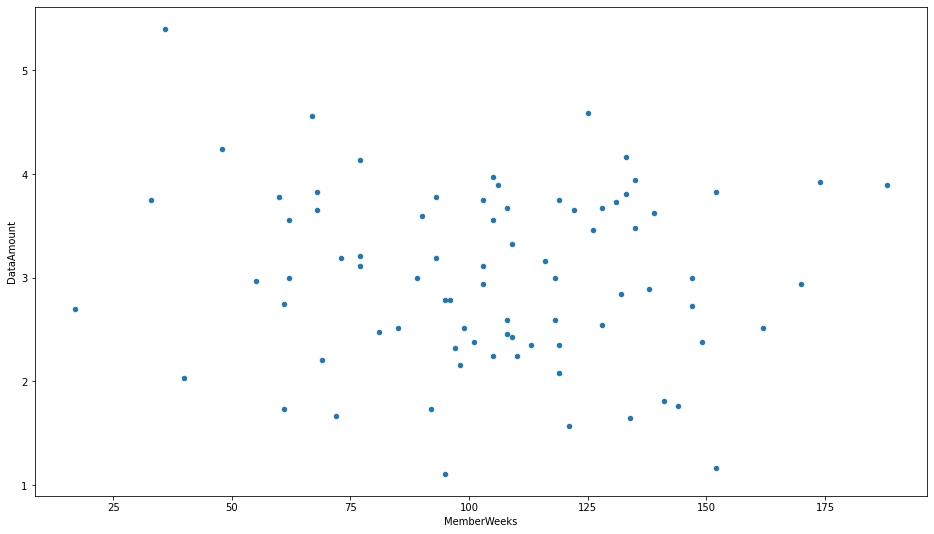

In [94]:
nouse_usedata.plot.scatter(x='MemberWeeks',y='DataAmount')
#가입해지한 사람중 데이터 사용하는 사람의 가입기간별 데이터 사용량

### 가입해지를 한 사람들의 가입기간과 콜센터 전화시간.
#### 가설: 가입해지를 한 사람들은 콜센터에 전화 시간이 많을 수록 가입기간이 짧다.
#### 결과: 가입을 해지한 사람들의 콜센터에 전화 시간이 많다하여 가입기간이 짧거나 길지 않다.

<AxesSubplot:xlabel='MemberWeeks', ylabel='CalMins'>

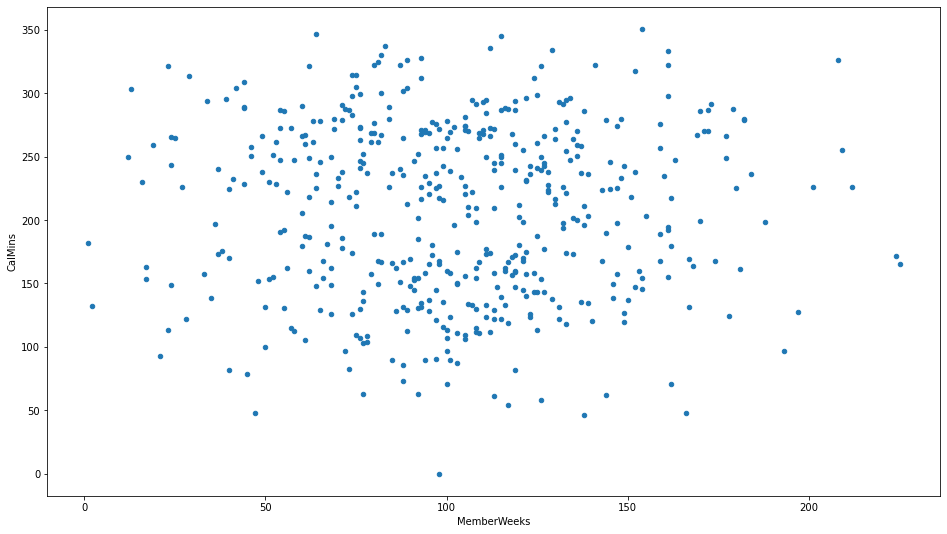

In [95]:
no_use.plot.scatter(x='MemberWeeks',y='CalMins')
#가입해지 한사람의 가입기간, 콜센터 전화시간

### 가입을 유지한 사람들의 가입기간과 콜센터 전화시간
#### 가설: 가입을 유지한 사람들은 가입 유지가 길수록 콜센터에 전화를 한 시간이 짧을 것이다.
#### 결과: 가입을 유지한 사람들이 가입기간에 따라 콜센터에 전화를 한 시간의 차이가 나지 않는다.

<AxesSubplot:xlabel='MemberWeeks', ylabel='CalMins'>

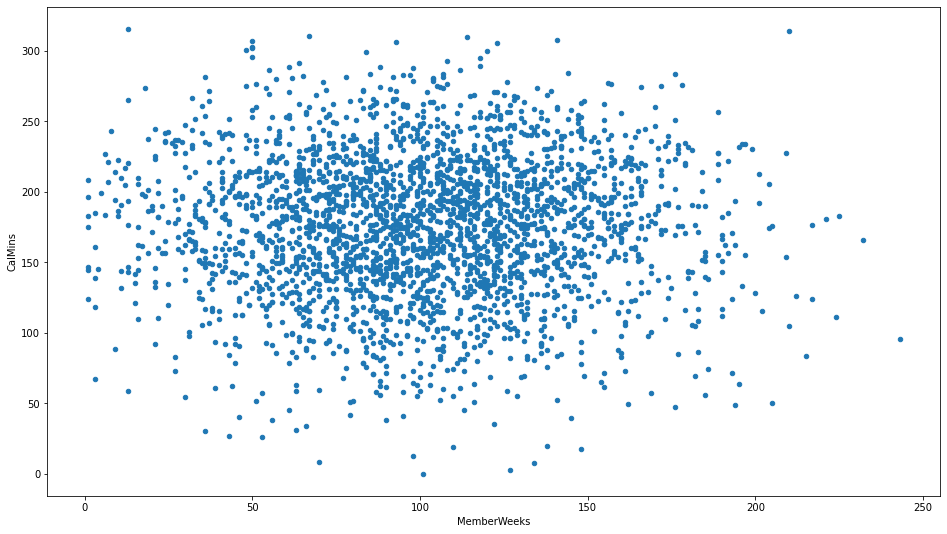

In [96]:
use_tel.plot.scatter(x='MemberWeeks',y='CalMins')
#가입 한사람의 가입기간, 콜센터 전화시간

### 가입을 해지한 사람의 가입기간과 월평균 전화 횟수
#### 가설: 가입을 해지했다면 월평균 전화 횟수가 적을 것이다.
#### 결과: 가입을 해지 했다고 월평균 전화 횟수가 적거나 많지 않다.

<AxesSubplot:xlabel='MemberWeeks', ylabel='CalCounts'>

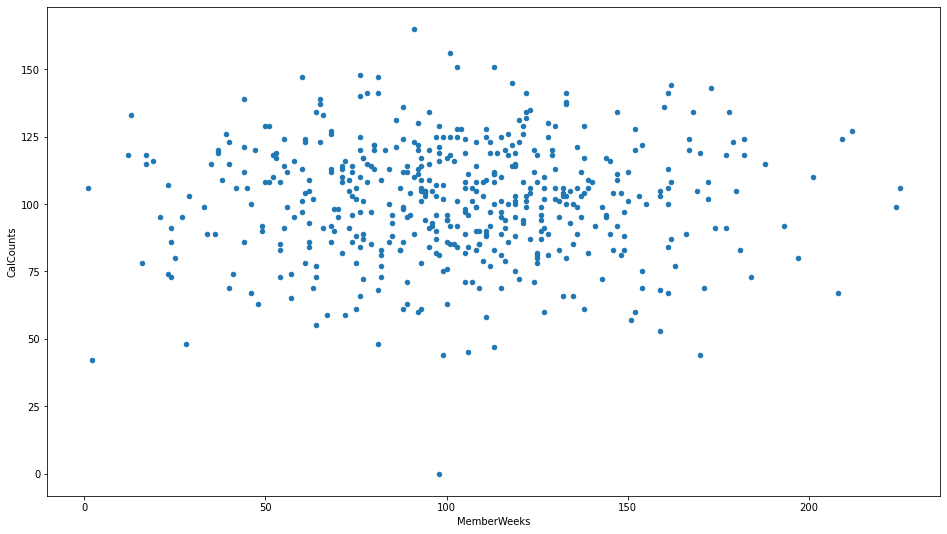

In [97]:
no_use.plot.scatter(x='MemberWeeks',y='CalCounts')
#가입해지한 사람의 가입기간, 월평균전화횟수

### 가입유지한 사람의 가입기간과 월평균 전화 횟수
#### 가설: 가입을 유지한 사람들은 가입기간이 길수록 월평균 전화 횟수가 많아질것이다.
#### 결과: 가입을 유지한 사람들이 가입기간에 다라 월평균 전화 횟수에 대한 차이는 없다.

<AxesSubplot:xlabel='MemberWeeks', ylabel='CalCounts'>

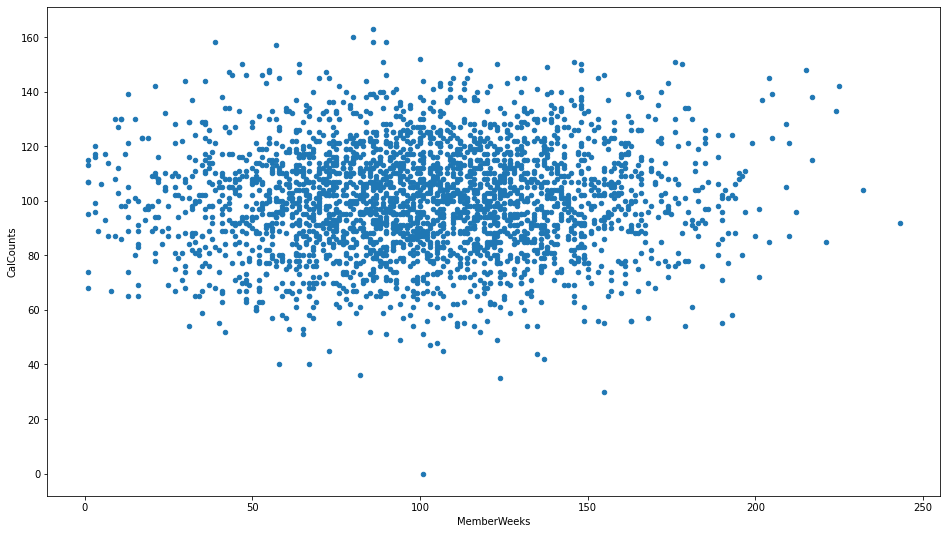

In [98]:
use_tel.plot.scatter(x='MemberWeeks',y='CalCounts')
#가입유지한 사람의 가입기간, 월평균전화횟수

### 가입을 해지한 사람의 통화량과 통화 횟수
#### 가설: 가입을 해지한 사람들에 한하여 통화 횟수가 많을 수록 통화량이 많을 것이다.
#### 결과: 통화량과 통화시간은 비례하지 않는다. 

<AxesSubplot:xlabel='CalMins', ylabel='CalCounts'>

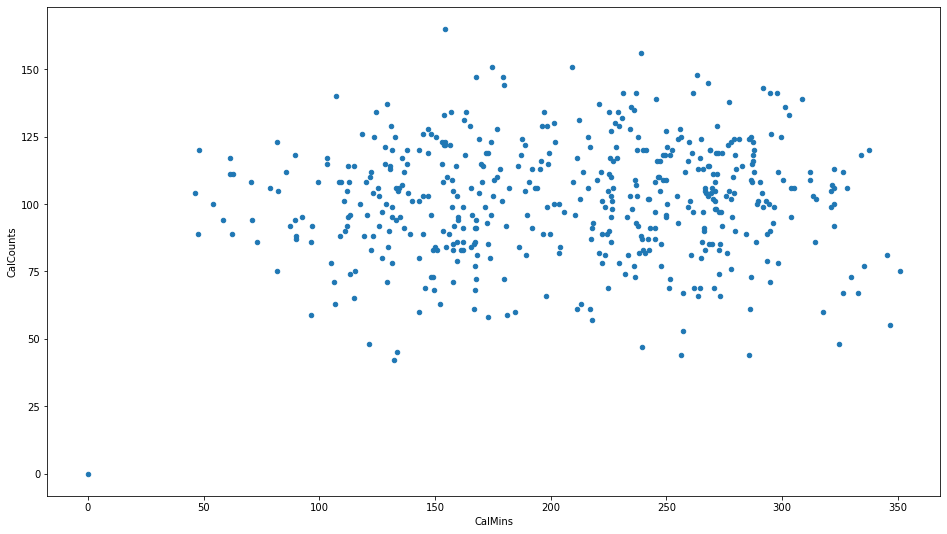

In [99]:
no_use.plot.scatter(x='CalMins',y='CalCounts') #통화횟수가 많다하여 통화시간이 많은것은 아니다. 대부분 비슷하다.
#가입해지한 사람의 통화량과 통화횟수

### 가입을 유지한 사람의 통화량과 통화 횟수
#### 가설: 가입을 유지한 사람들에 한하여 통화 횟수가 많을 수록 통화량이 많을 것이다.
#### 결과: 통화량과 통화시간은 비례하지 않는다. 

<AxesSubplot:xlabel='CalMins', ylabel='CalCounts'>

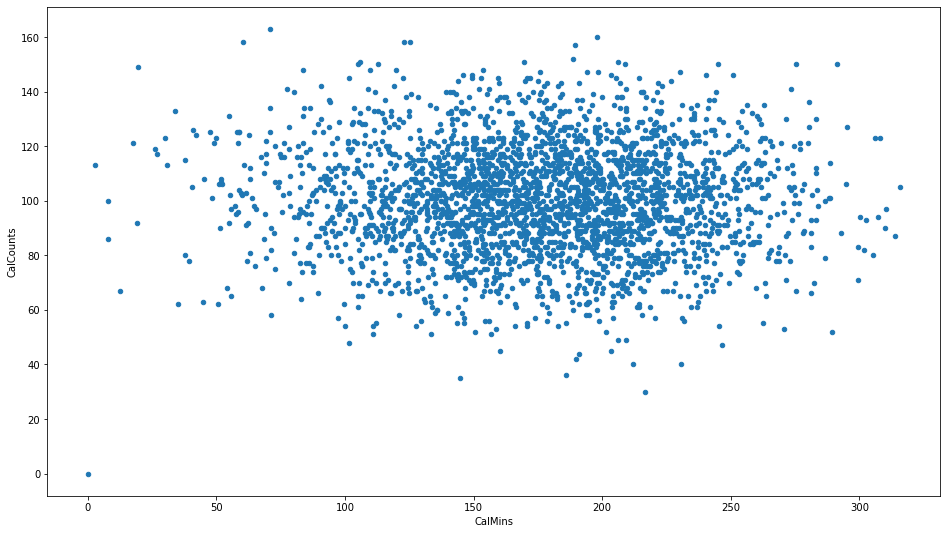

In [100]:
use_tel.plot.scatter(x='CalMins',y='CalCounts')
#가입유지한 사람의 통화량과 통화횟수

### 가입해지를 했고 데이터사용을 했던 사람중 데이터 사용량과 월 요금제
#### 가설: 데이터 사용량이 많으면 월 요금제가 높을 것이다.
#### 결과: 우상향 그래프의 결과가 나오듯 데이터의 사용량에 따라 월 요금제가 높다.

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

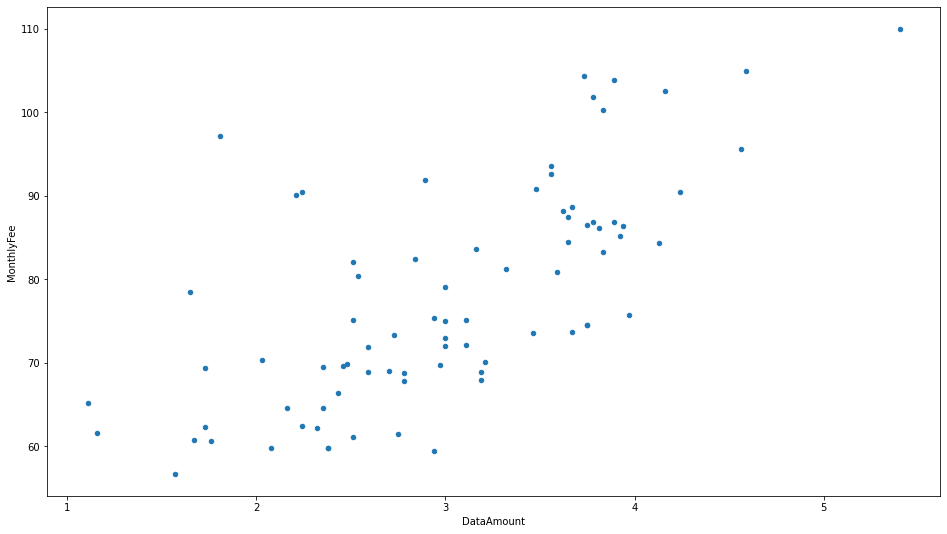

In [101]:
nouse_usedata.plot.scatter(x='DataAmount',y='MonthlyFee') 

### 가입해지를 했고 데이터 미사용을 했던 사람중 데이터 사용량과 월 요금제
#### 가설: 데이터를 사용안한 사람도 데이터를 사용 했을 것이며, 추가 데이터 사용량에 따라 요금제가 높을 것이다.
#### 결과: 데이터를 추가적으로 사용한 사람은 있지만 요금제와는 별 상관이 없어 보인다.

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

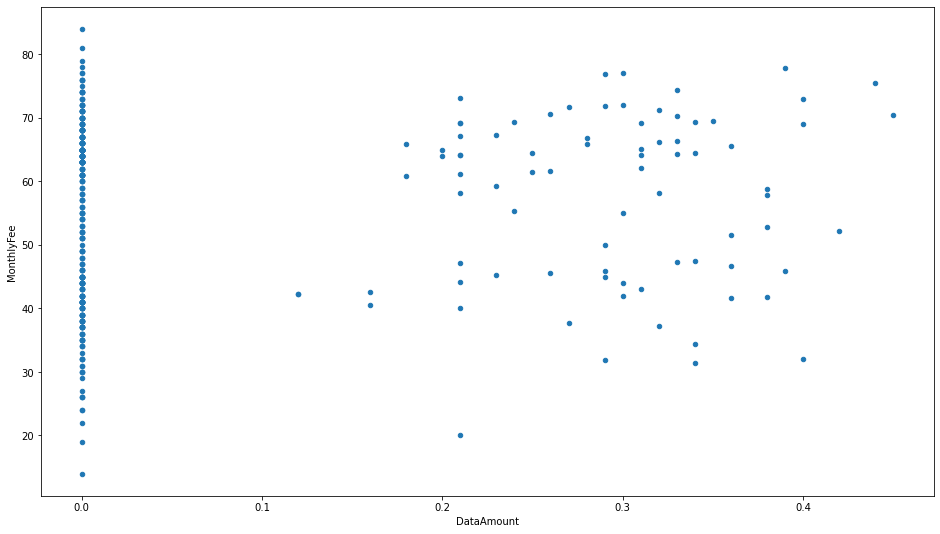

In [102]:
nouse_nodata.plot.scatter(x='DataAmount',y='MonthlyFee') 

### 가입유지를 하고 데이터사용을 했던 사람중 데이터 사용량과 월 요금제
#### 가설: 데이터 사용량이 많으면 월 요금제가 높을 것이다.
#### 결과: 우상향 그래프의 결과가 나오듯 데이터의 사용량에 따라 월 요금제가 높다.

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

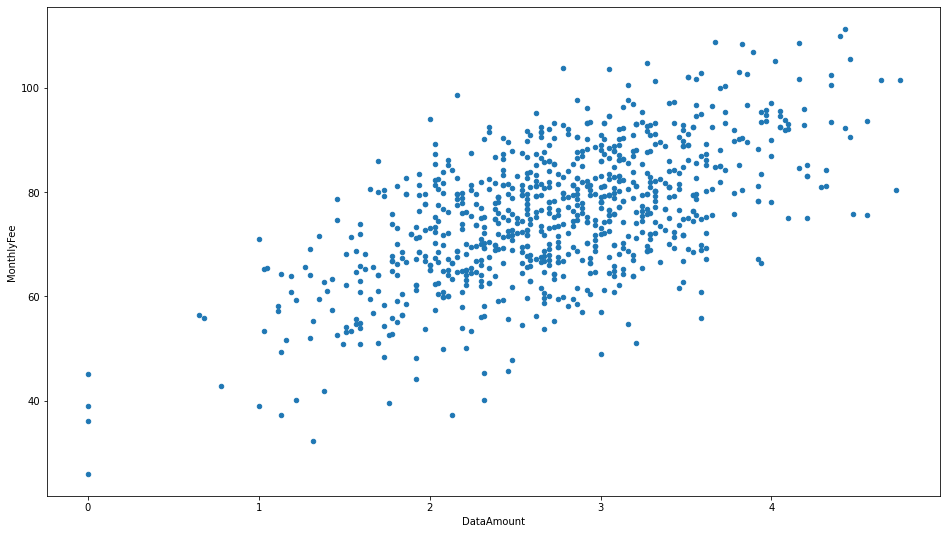

In [103]:
use_usedata.plot.scatter(x='DataAmount',y='MonthlyFee') 

### 가입유지를 하고 데이터사용을 안 했던 사람중 데이터 사용량과 월 요금제
#### 가설: 데이터 추가 사용량이 많으면 월 요금제가 높을 것이다.
#### 결과: 추가 데이터 사용량과 월 요금제와 무관하다.

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

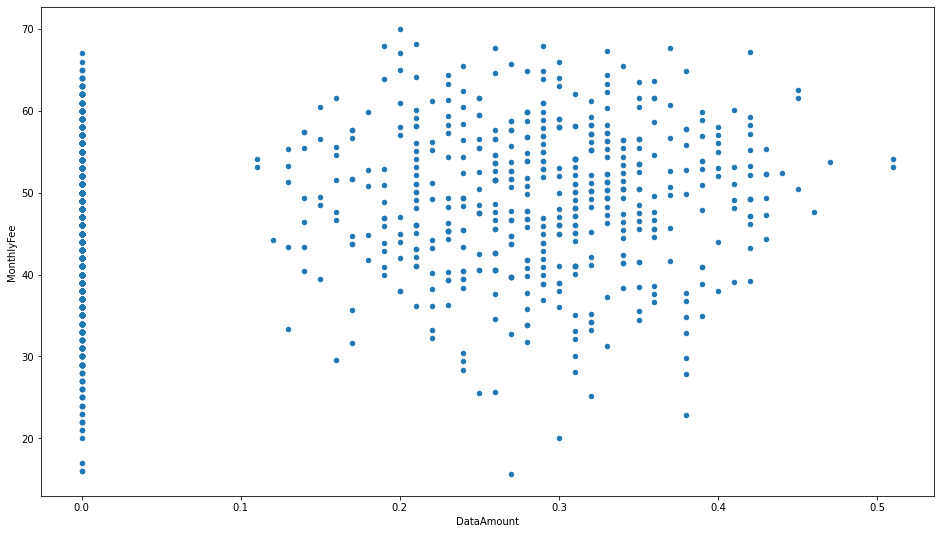

In [104]:
use_nodata.plot.scatter(x='DataAmount',y='MonthlyFee') 

### 가입을 해지한 사람들의 통화량과 월요금제
#### 가설: 통화량이 많다면 월 요금제가 높을 것이다.
#### 결과: 우상향 그래프로 결과가 나왔다. 이는 밀접한 관계가 있다고 보인다.

<AxesSubplot:xlabel='CalMins', ylabel='MonthlyFee'>

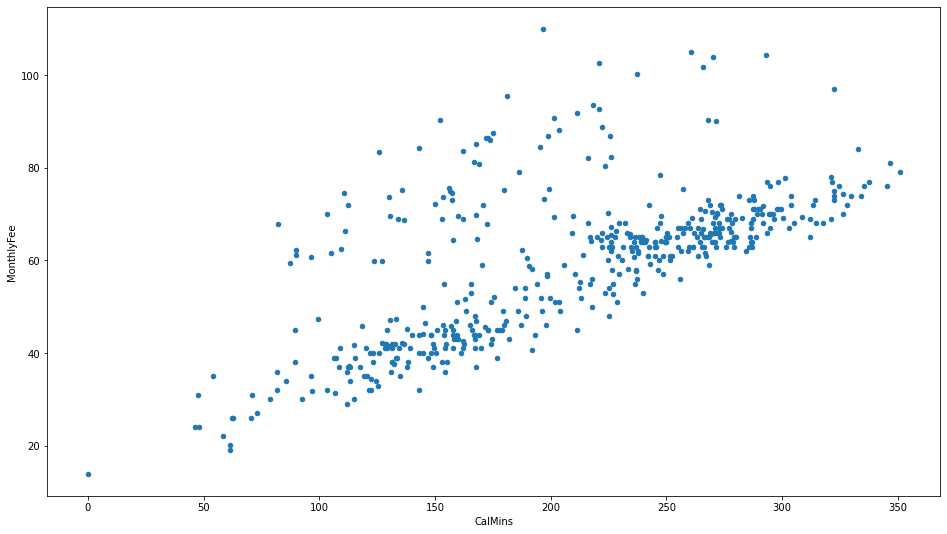

In [105]:
no_use.plot.scatter(x='CalMins',y='MonthlyFee')
#가입해지한 사람의 통화량과 월요금

### 가입을 유지한 사람들의 통화량과 월요금제
#### 가설: 통화량이 많다면 월 요금제가 높을 것이다.
#### 결과: 우상향 그래프로 결과가 나왔다. 이는 밀접한 관계가 있다고 보인다.

<AxesSubplot:xlabel='CalMins', ylabel='MonthlyFee'>

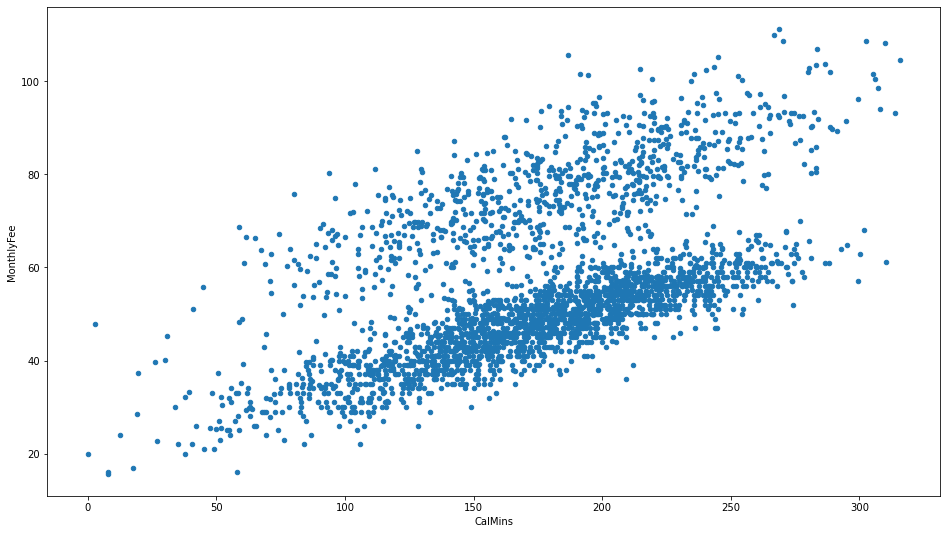

In [106]:
use_tel.plot.scatter(x='CalMins',y='MonthlyFee')
#가입유지한 사람의 통화량과 월평균요금

### 가입을 해지하고 데이터 사용 안하는 사람들의 데이터 사용량과 추가요금
#### 가설: 데이터 사용량(추가)이 많다면 추가요금이 비례하여 발생 된다.
#### 결과: 데이터 사용량(추가)이 많다고 추가요금이 비례하여 많이 발생하지 않음. 따라서 데이터 사용과는 무관하게 다른 이유로 추가요금이 발생.

<AxesSubplot:xlabel='DataAmount', ylabel='OverFee'>

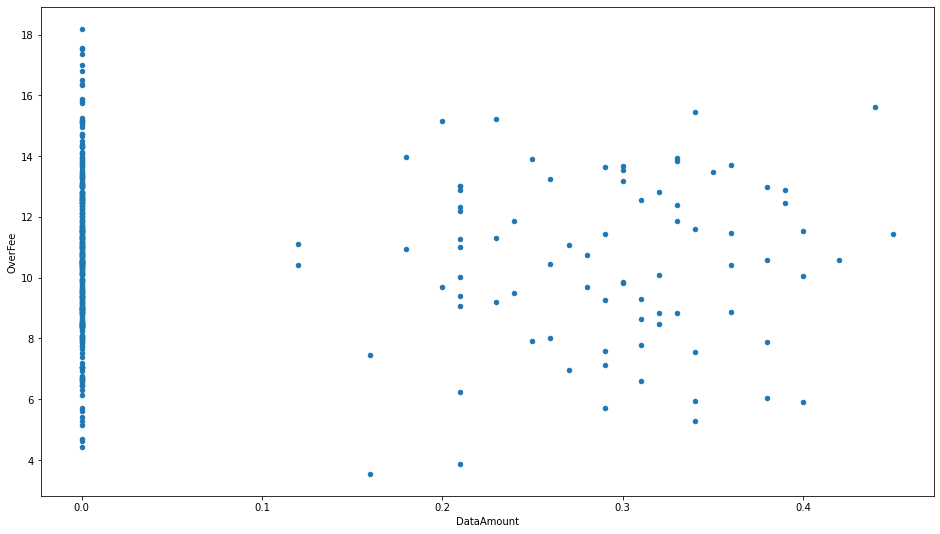

In [107]:
nouse_nodata.plot.scatter(x='DataAmount',y='OverFee') 

### 가입을 해지하고 데이터 사용하는 사람들의 데이터 사용량과 추가요금
#### 가설: 데이터 사용량(추가)이 많다면 추가요금이 비례하여 발생 된다.
#### 결과: 데이터 사용량(추가)이 많다고 추가요금이 비례하여 많이 발생하지 않음. 따라서 데이터 사용과는 무관하게 다른 이유로 추가요금이 발생.

<AxesSubplot:xlabel='DataAmount', ylabel='OverFee'>

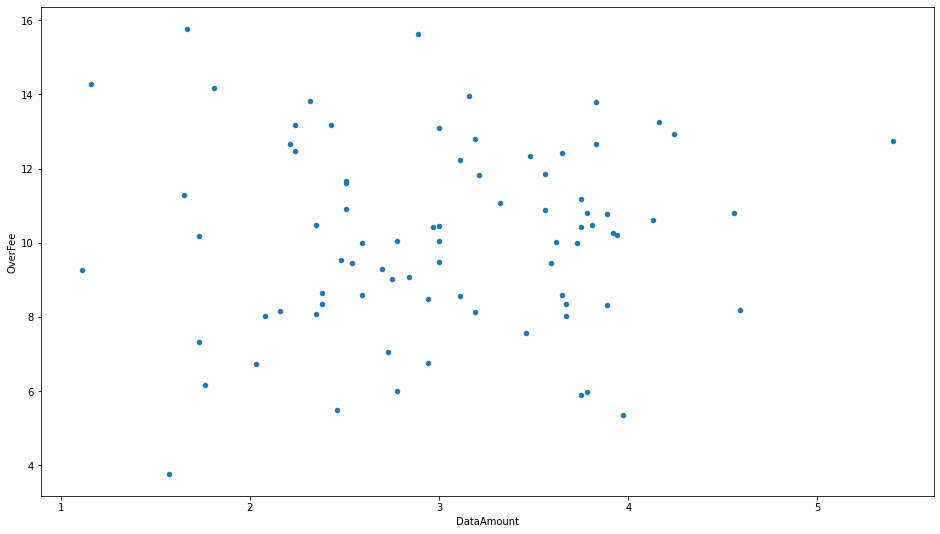

In [108]:
nouse_usedata.plot.scatter(x='DataAmount',y='OverFee') 

### 가입을 유지하고 데이터 사용 안하는 사람들의 데이터 사용량과 추가요금
#### 가설: 데이터 사용량(추가)이 많다면 추가요금이 비례하여 발생 된다.
#### 결과: 데이터 사용량(추가)이 많다고 추가요금이 비례하여 많이 발생하지 않음. 따라서 데이터 사용과는 무관하게 다른 이유로 추가요금이 발생.

<AxesSubplot:xlabel='DataAmount', ylabel='OverFee'>

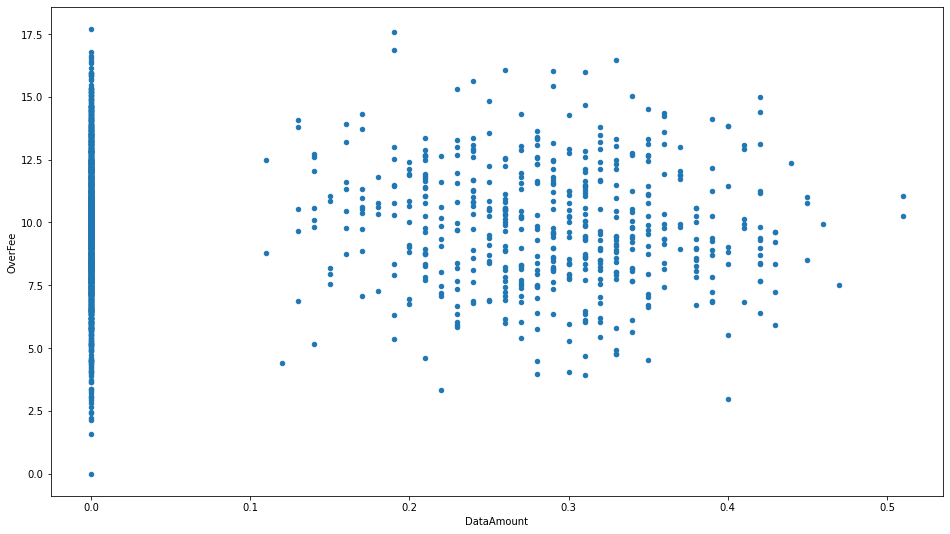

In [109]:
use_nodata.plot.scatter(x='DataAmount',y='OverFee') 

### 가입을 해지하고 데이터 사용하는 사람들의 데이터 사용량과 추가요금
#### 가설: 데이터 사용량(추가)이 많다면 추가요금이 비례하여 발생 된다.
#### 결과: 데이터 사용량(추가)이 많다고 추가요금이 비례하여 추가요금이 발생이 되는 것으로 보인다.

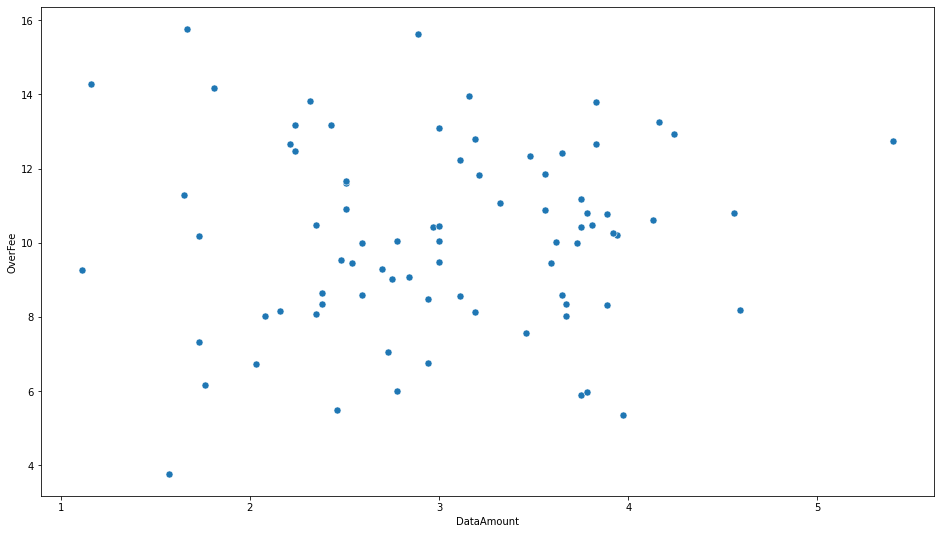

In [110]:
sns.scatterplot(x='DataAmount', 
                y='OverFee', 
                s=50,
                data=nouse_usedata)
plt.show()

### 가입을 유지한 사람들의 통화시간과 초과요금
#### 가설: 통화시간이 많으면 초과요금이 많이 발생한다.
#### 결과: 통화시간과 초과요금이 비례하지 않는다.

<AxesSubplot:xlabel='CalMins', ylabel='OverFee'>

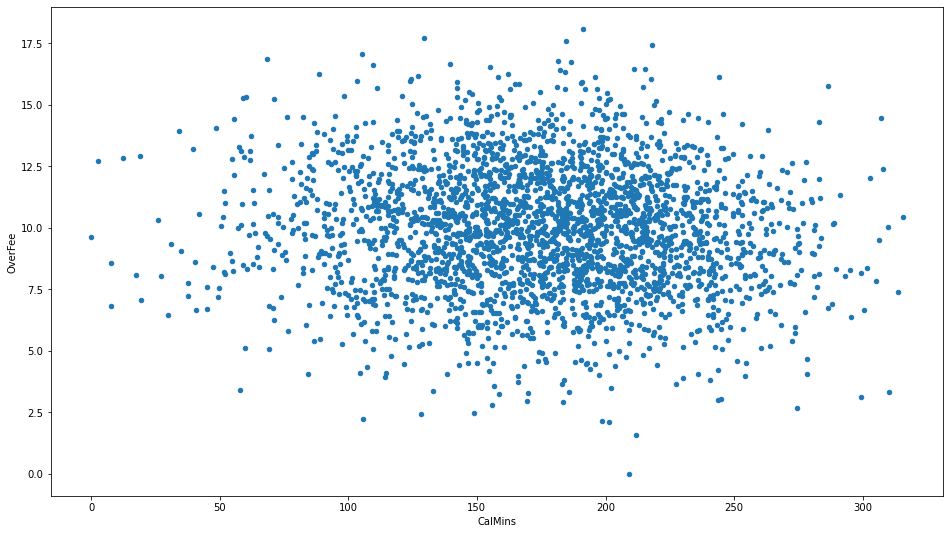

In [111]:
use_tel.plot.scatter(x='CalMins',y='OverFee')
#가입유지한 사람의 통화시간, 초과요금

### 가입을 해지한 사람들의 통화시간과 초과요금
#### 가설: 통화시간이 많으면 초과요금이 많이 발생한다.
#### 결과: 통화시간과 초과요금이 비례하지 않는다.

<AxesSubplot:xlabel='CalCounts', ylabel='MonthlyFee'>

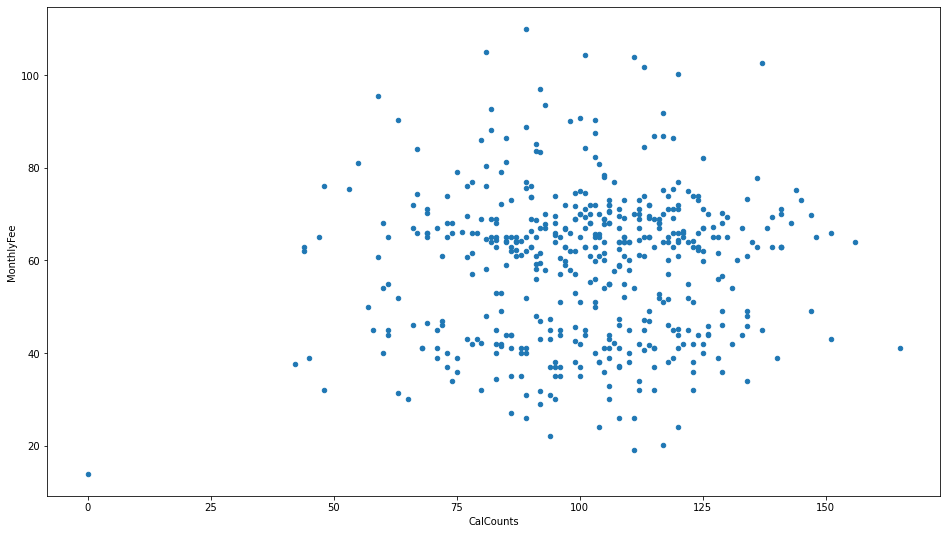

In [112]:
no_use.plot.scatter(x='CalCounts',y='MonthlyFee')
#가입해지한 사람의 전화횟수와 월요금

### 가입유지한 사람의 전화횟수와 월요금
#### 가설: 전화횟수가 많으면 월 요금이 많을것이다.
#### 결과: 전화횟수와 월 요금은 상관관계가 적다.

<AxesSubplot:xlabel='CalCounts', ylabel='MonthlyFee'>

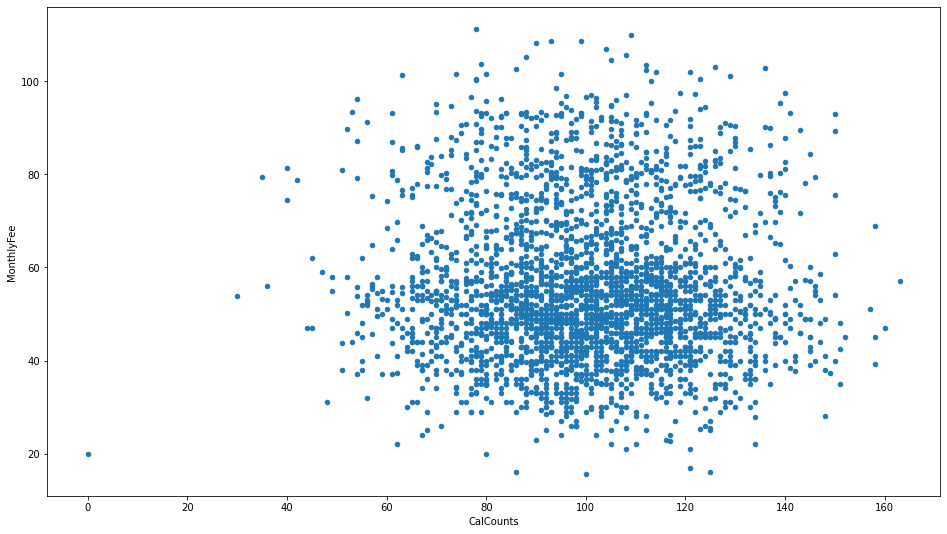

In [113]:
use_tel.plot.scatter(x='CalCounts',y='MonthlyFee')
#가입유지한 사람의 전화횟수와 월요금

### 가입해지한 사람중 데이터를 사용한 사람의 로밍시간과 데이터 사용량
#### 가설: 로밍시간이 많을 수록 데이터 사용량이 많다.
#### 결과: 우상향 그래프를 보아하니 로밍시간이 많을 수록 데이터 사용량이 많다. 

<AxesSubplot:xlabel='RoamingMin', ylabel='DataAmount'>

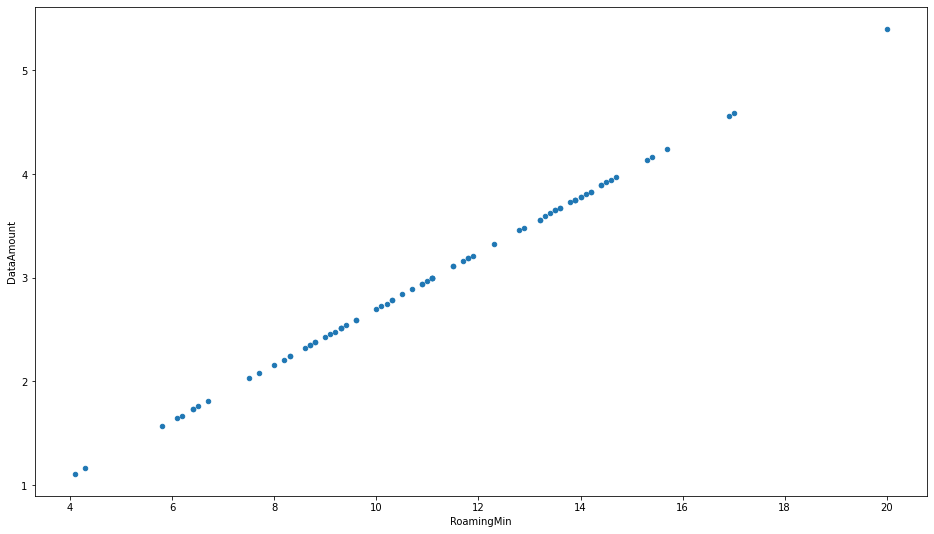

In [114]:
nouse_usedata.plot.scatter(x='RoamingMin',y='DataAmount') #데이터 사용량 0 소거

### 가입유지한 사람중 데이터를 사용한 사람의 로밍시간과 데이터 사용량
#### 가설: 로밍시간이 많을 수록 데이터 사용량이 많다.
#### 결과: 우상향 그래프를 보아하니 로밍시간이 많을 수록 데이터 사용량이 많다. 

<AxesSubplot:xlabel='RoamingMin', ylabel='DataAmount'>

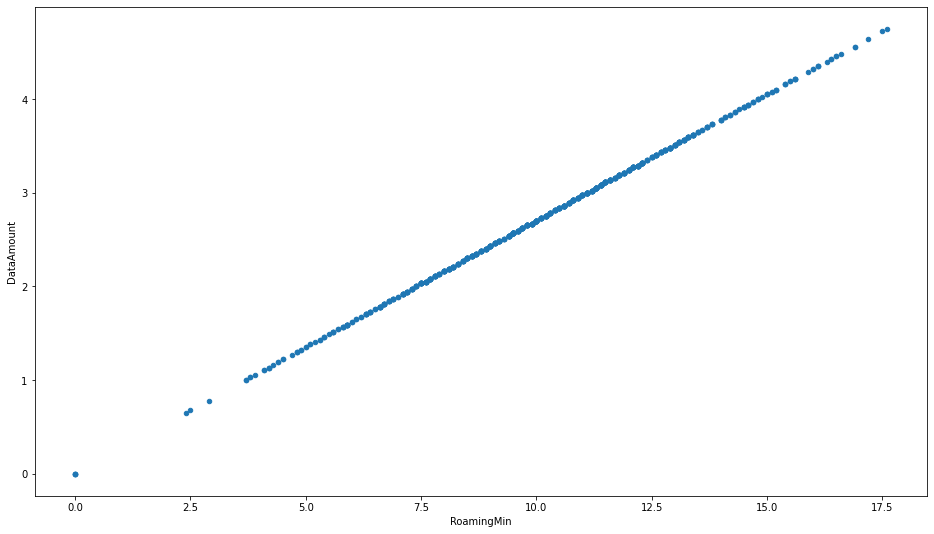

In [115]:
use_usedata.plot.scatter(x='RoamingMin',y='DataAmount') #데이터 사용량 0 소거

### 가입해지한 사람중 추가요금과 콜센터 전화 횟수
#### 가설: 추가요금이 발생이 많이 된다면 콜센터에 전화를 많이한다.
#### 결과: 추가요금에 따른 콜센터 전화 횟수는 증가하지 않는다.

<AxesSubplot:xlabel='OverFee', ylabel='Callcenter'>

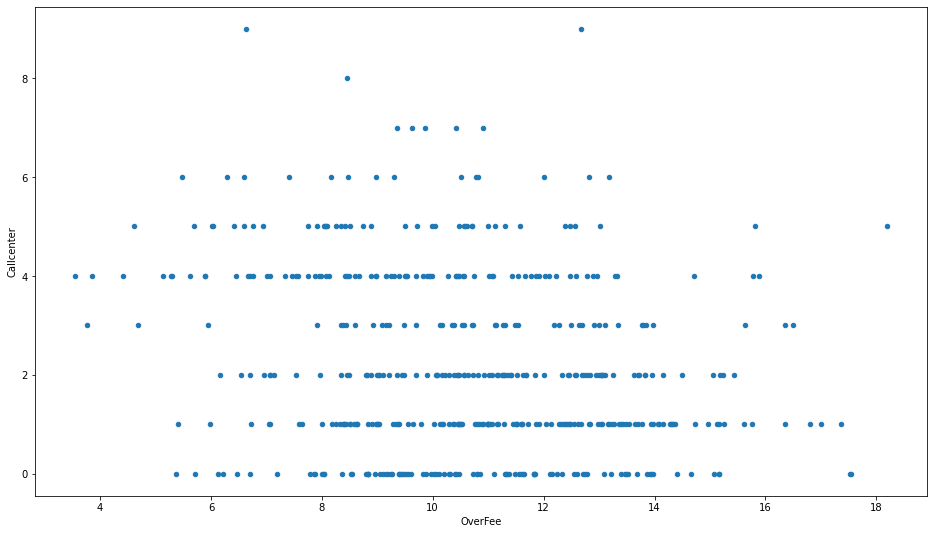

In [116]:
no_use.plot.scatter(x='OverFee',y='Callcenter') 

### 가입유지한 사람중 추가요금과 콜센터 전화 횟수
#### 가설: 추가요금이 발생이 많이 된다면 콜센터에 전화를 많이한다.
#### 결과: 추가요금에 따른 콜센터 전화 횟수는 증가하지 않는다.

<AxesSubplot:xlabel='OverFee', ylabel='Callcenter'>

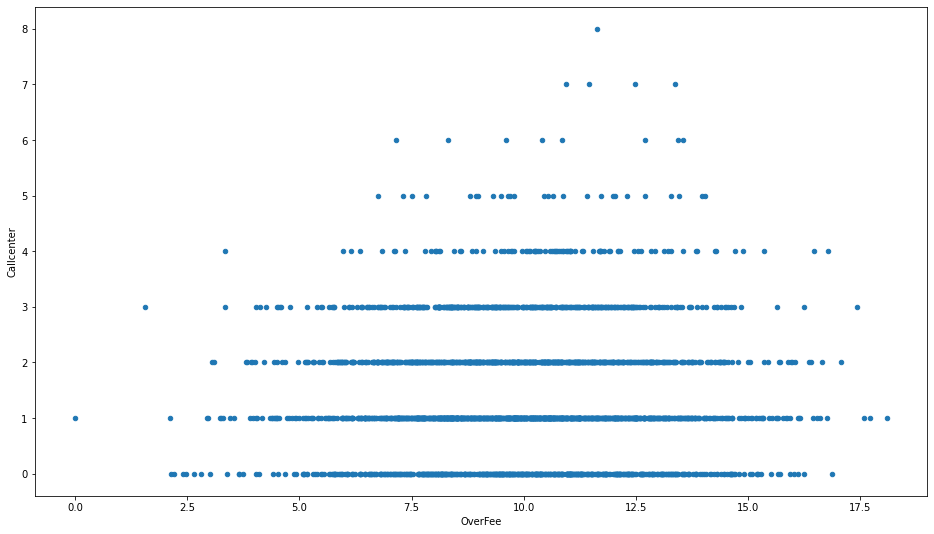

In [117]:
use_tel.plot.scatter(x='OverFee',y='Callcenter') 

### 가입해지한 사람중 로밍시간과 콜센터에 전화량
#### 가설: 로밍시간이 많으면 콜센터에 전화를 많이 한다.
#### 결과: 로밍시간과 콜센터의 전화량은 비례하지 않는다.

<AxesSubplot:xlabel='RoamingMin', ylabel='Callcenter'>

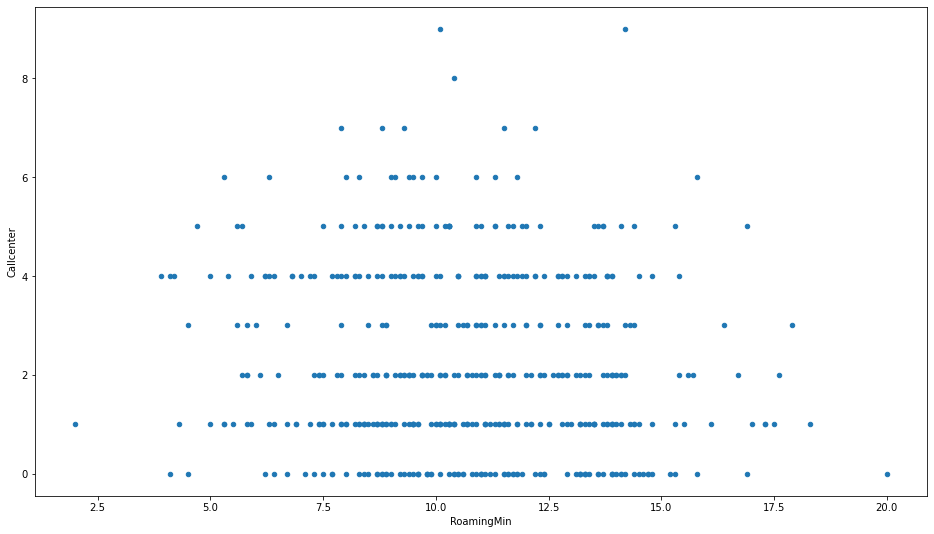

In [118]:
no_use.plot.scatter(x='RoamingMin',y='Callcenter') 

### 가입유지한 사람중 로밍시간과 콜센터에 전화량
#### 가설: 로밍시간이 많으면 콜센터에 전화를 많이 한다.
#### 결과: 로밍시간과 콜센터의 전화량은 비례하지 않는다.

<AxesSubplot:xlabel='RoamingMin', ylabel='Callcenter'>

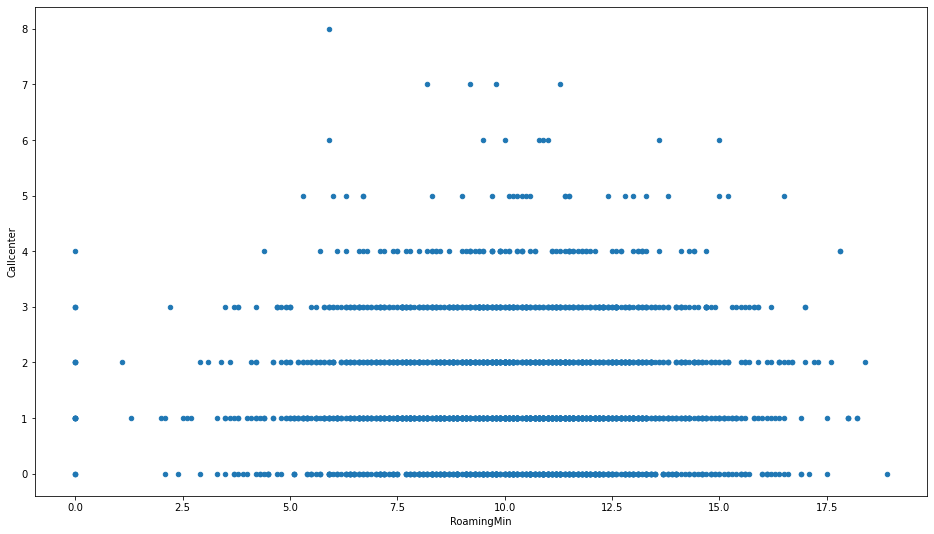

In [119]:
use_tel.plot.scatter(x='RoamingMin',y='Callcenter') 

## 대분류: 데이터사용량과 월평균 요금비교
### 소분류: 데이터 사용유무와 가입해지 여부
####
### 결과 
#### 1. 데이터를 사용하지 않은 그룹에서 월평균 요금이 높을수록 해지하는 사람이 많다.
#### 2. 데이터를 사용하는 그룹에서는 해지및 유지하는 사람의 구분이 될 명확한 차이는 없다.
#### 3. 육안으로 그래프를 볼때 데이터 미사용 그룹에서 월 평균 요금이 60이상인 사람에 대하여 해지율이 높아 보이나 8.41% 수준으로 낮다.

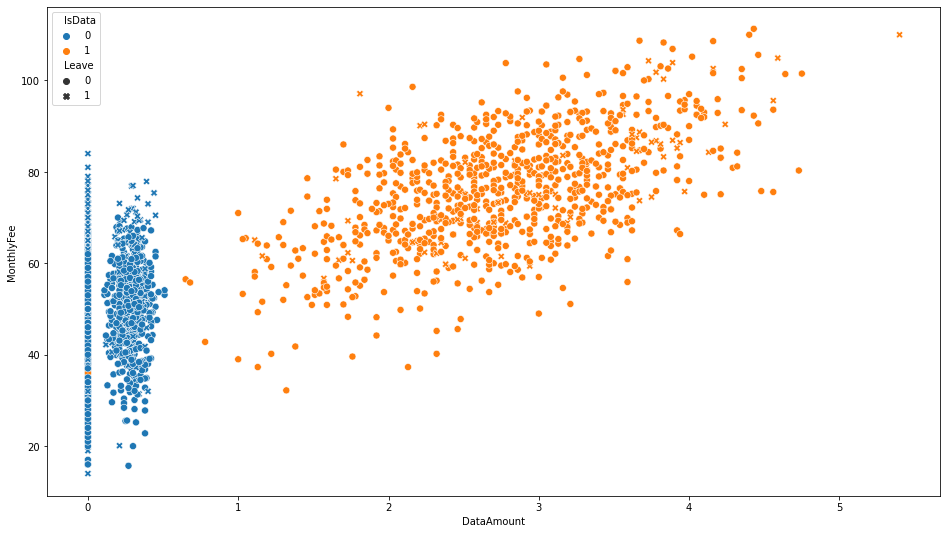

In [120]:
sns.scatterplot(x='DataAmount', 
                y='MonthlyFee', 
                hue='IsData',
                style='Leave',
                s=50, 
                data=tel)
plt.show()

In [121]:
asdf = use_data.DataAmount>0
use_data[asdf].DataAmount.sort_values().head(1)

3216   0.65
Name: DataAmount, dtype: float64

In [122]:

ht_test=(nouse_nodata['DataAmount']<0.65) & (nouse_nodata['MonthlyFee']>60)
aa = nouse_nodata[ht_test]
len(aa)/len(no_data)*100

8.41974284529241

#### 
### 가입을 해지한 그룹과 유지한 그룹간의 큰 차이는 나타나지 않았습니다.
#### 산점도로 표현을 하여 상관관계를 표현하였습니다.
#### 대부분의 데이터가 연속형 데이터 이기에 bar형태의 그래프로 나타내기엔 '부적합'하다 판단 하였습니다.
#### 산점도 그래프로 상관관계가 있는지 파악하기가 더 수월했습니다.
#### 가장 의미있는 데이터는 
#### 1. 가입 해지 여부와 상관없이 통화시간이 많으면 월평균 요금이 높다. 하지만 통화 횟수와는 무관하다.
#### 2. 가입 해지 여부와 상관없이 데이터사용량이 많으면 월평균 요금이 높다. 
#### 3. 가입 해지 여부와 상관없이 로밍시간이 길수록 데이터 사용량은 높다.